In [100]:
import numpy as np
from numpy import dtype
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression

LOADING THE DATASET

In [6]:
data = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
print(data.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


DATA EXPLORATION

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


In [9]:
# CHECKING THE FIRST 10 ROWS
print(data.head(10))

    Loan_ID  Gender Married  ... Loan_Amount_Term Credit_History Property_Area
0  LP001015    Male     Yes  ...            360.0            1.0         Urban
1  LP001022    Male     Yes  ...            360.0            1.0         Urban
2  LP001031    Male     Yes  ...            360.0            1.0         Urban
3  LP001035    Male     Yes  ...            360.0            NaN         Urban
4  LP001051    Male      No  ...            360.0            1.0         Urban
5  LP001054    Male     Yes  ...            360.0            1.0         Urban
6  LP001055  Female      No  ...            360.0            1.0     Semiurban
7  LP001056    Male     Yes  ...            360.0            0.0         Rural
8  LP001059    Male     Yes  ...            240.0            1.0         Urban
9  LP001067    Male      No  ...            360.0            1.0     Semiurban

[10 rows x 12 columns]


In [10]:
print(data.tail(10))

      Loan_ID  Gender Married  ... Loan_Amount_Term Credit_History Property_Area
357  LP002952    Male      No  ...            360.0            1.0         Urban
358  LP002954    Male     Yes  ...            360.0            NaN         Rural
359  LP002962    Male      No  ...            360.0            1.0     Semiurban
360  LP002965  Female     Yes  ...            360.0            NaN         Urban
361  LP002969    Male     Yes  ...            360.0            1.0     Semiurban
362  LP002971    Male     Yes  ...            360.0            1.0         Urban
363  LP002975    Male     Yes  ...            360.0            1.0         Urban
364  LP002980    Male      No  ...            360.0            NaN     Semiurban
365  LP002986    Male     Yes  ...            360.0            1.0         Rural
366  LP002989    Male      No  ...            180.0            1.0         Rural

[10 rows x 12 columns]


In [11]:
# CHECKING THE COLUMNS IN THE DATASET
all_columns = {}
num = 1
# all_columns = {}
for dat in data.columns:
    # print(dat)
    # print(dtype(data[dat]))
    all_columns.update({f"column{num}":{dat: dtype(data[dat])}})
    num += 1

print(all_columns)

{'column1': {'Loan_ID': dtype('O')}, 'column2': {'Gender': dtype('O')}, 'column3': {'Married': dtype('O')}, 'column4': {'Dependents': dtype('O')}, 'column5': {'Education': dtype('O')}, 'column6': {'Self_Employed': dtype('O')}, 'column7': {'ApplicantIncome': dtype('int64')}, 'column8': {'CoapplicantIncome': dtype('int64')}, 'column9': {'LoanAmount': dtype('float64')}, 'column10': {'Loan_Amount_Term': dtype('float64')}, 'column11': {'Credit_History': dtype('float64')}, 'column12': {'Property_Area': dtype('O')}}


In [12]:
# # CHECKING FOR MISSING VALUES IN EACH COLUMN

# # print(data.isnull().values().any())
# from pandas import isnull


missing_row_list = []
# gender = data["Gender"].isnull()
# first_20 = gender[: 20]
# second_20 = gender[21: 41 ]
# third_20 = gender[42: 62]
# fourth_20 = gender[63: 83]
# fifth_20 = gender[84:1]
missing_row_dict = {}

# num = 0
for col in data.columns:
    # print(col)
    missing = data[col].isnull()
    # print(missing)
    for indx, val in zip(missing.index, missing):
        # print(f"{indx}: {val}")
        if val == True:
            missing_row_dict.update({f"row{indx}": val})
    missing_row_list.append({col: missing_row_dict})
        # break
        # num  +=1
print(len((missing_row_list[1]["Gender"].values())))
# print(first_20)
# # print(second_20) #row 22 has a missing val
# # print(third_20) #row 51 has a missing value
# # print(fourth_20)


78


In [13]:
print(data.describe().round(3))

       ApplicantIncome  CoapplicantIncome  ...  Loan_Amount_Term  Credit_History
count          367.000            367.000  ...           361.000         338.000
mean          4805.599           1569.578  ...           342.537           0.825
std           4910.685           2334.232  ...            65.157           0.380
min              0.000              0.000  ...             6.000           0.000
25%           2864.000              0.000  ...           360.000           1.000
50%           3786.000           1025.000  ...           360.000           1.000
75%           5060.000           2430.500  ...           360.000           1.000
max          72529.000          24000.000  ...           480.000           1.000

[8 rows x 5 columns]


DATA CLEANING/PREPROCESSING

In [14]:
# Converting to data loaded to DataFrame
df  = pd.DataFrame(data)
print(df)

      Loan_ID Gender Married  ... Loan_Amount_Term Credit_History Property_Area
0    LP001015   Male     Yes  ...            360.0            1.0         Urban
1    LP001022   Male     Yes  ...            360.0            1.0         Urban
2    LP001031   Male     Yes  ...            360.0            1.0         Urban
3    LP001035   Male     Yes  ...            360.0            NaN         Urban
4    LP001051   Male      No  ...            360.0            1.0         Urban
..        ...    ...     ...  ...              ...            ...           ...
362  LP002971   Male     Yes  ...            360.0            1.0         Urban
363  LP002975   Male     Yes  ...            360.0            1.0         Urban
364  LP002980   Male      No  ...            360.0            NaN     Semiurban
365  LP002986   Male     Yes  ...            360.0            1.0         Rural
366  LP002989   Male      No  ...            180.0            1.0         Rural

[367 rows x 12 columns]


In [15]:
# Total number of null value in each column
print(df.isnull().sum(axis=0))

# Making new dataframe with dropped NaN Value
new_df = data.dropna(axis=0, how="any")
print(len(new_df))




Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64
289


In [39]:
# print(new_df.dtypes)
print(new_df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [16]:
# Checking for the unique value in each column in dataFrame

unique_val  ={}
# print(df["Gender"].unique())
for col in new_df.columns:
    # print(col)
    if col == "Loan_ID" or col == "ApplicantIncome" or col == "CoapplicantIncome" or col == "LoanAmount":
       continue 
    unique = new_df[col].unique()
    unique_val.update({col:unique})
print(unique_val)

{'Gender': array(['Male', 'Female'], dtype=object), 'Married': array(['Yes', 'No'], dtype=object), 'Dependents': array(['0', '1', '2', '3+'], dtype=object), 'Education': array(['Graduate', 'Not Graduate'], dtype=object), 'Self_Employed': array(['No', 'Yes'], dtype=object), 'Loan_Amount_Term': array([360., 180., 480.,  84., 240.,  12., 300., 350.,  36., 120.,   6.]), 'Credit_History': array([1., 0.]), 'Property_Area': array(['Urban', 'Semiurban', 'Rural'], dtype=object)}


In [17]:
# Coding the Categorical Variable into Numerical Variable


# {"Gender": {"Male": 0, "Female": 1}, "Married": {"Yes": 0, "No": 1}, "Education": {"Graduate": 0, "Not Graduate": 1}, "Self_Employed": {"Yes": 0, "No": 1}, "Propert_Area": {"Urban": 0, "Semiurban": 1, "Rural": 2}}
# new_df.replace({"Gender": {"Male": 0, "Female": 1}, "Married": {"Yes": 0, "No": 1}, "Education": {"Graduate": 0, "Not Graduate": 1}, "Self_Employed": {"Yes": 0, "No": 1}, "Propert_Area": {"Urban": 0, "Semiurban": 1, "Rural": 2}}, inplace=True)

new_df.loc[:, ["Gender", "Married", "Education", "Self_Employed", "Property_Area"]] = new_df.loc[:, ["Gender", "Married", "Education", "Self_Employed", "Property_Area"]].replace({
    "Gender": {"Male": 0, "Female": 1},
    "Married": {"Yes": 0, "No": 1},
    "Education": {"Graduate": 0, "Not Graduate": 1},
    "Self_Employed": {"Yes": 0, "No": 1},
    "Property_Area": {"Urban": 0, "Semiurban": 1, "Rural": 2}
})

new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,0,0,0,1,5720,0,110.0,360.0,1.0,0
1,LP001022,0,0,1,0,1,3076,1500,126.0,360.0,1.0,0
2,LP001031,0,0,2,0,1,5000,1800,208.0,360.0,1.0,0
4,LP001051,0,1,0,1,1,3276,0,78.0,360.0,1.0,0
5,LP001054,0,0,0,1,0,2165,3422,152.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,0,0,1,0,1,2269,2167,99.0,360.0,1.0,1
362,LP002971,0,0,3+,1,0,4009,1777,113.0,360.0,1.0,0
363,LP002975,0,0,0,0,1,4158,709,115.0,360.0,1.0,0
365,LP002986,0,0,0,0,1,5000,2393,158.0,360.0,1.0,2


DATA CLEANING/PREPROCESSING
FEATURE NORMALIZATION

VARIABLES:
DEPENDENT VARABLES: LOAN STATUS (APPROVED OR NOT APPROVED), LOAN DEFAULT(LIKELY TO REPAY OR NOT LIKEL TO REPAY), LOAN AMOUNT(AMOUNT ELIGIBLE TO GET)

INDEPENDENT VARIABLE: GENDER, MARITAL STATUS, EDUCATION, SELF EMPLOYED, APPLICANT INCOME, LOAN AMOUNT, CREDIT HISTORY, PROPERTY AREA

CATEGORICAL VARIABLE: GENDER, MARRITAL STATUS, EDUCATION, SELF EMPLOYED, PROPERTY AREA

NORMALIZING VARIABLE: APPLICANT INCOME, LOAN AMOUNT, COAPPLICZNT INCOME, LOAN AMOUNT TERM

In [22]:
normalizer = Normalizer()
standard_scaler = StandardScaler()
minMax_scaler = MinMaxScaler(feature_range= (0, 1))

In [41]:
# x1 represent the normalizing variable 
x1  = new_df.loc[:, ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"]]
print(x1)

# new_df["ApplicantIncome"] = pd.to_numeric(df["ApplicantIncome"], errors="coerce")
# new_df["CoapplicantIncome"] = pd.to_numeric(df["CoapplicantIncome"], errors="coerce")
# new_df["LoanAmount"] = pd.to_numeric(df["LoanAmount"], errors="coerce")
# new_df["Loan_Amount_Term"] = pd.to_numeric(df["Loan_Amount_Term"], errors="coerce")
# new_df["Credit_History"] = pd.to_numeric(df["Credit_History"], errors="coerce")


     ApplicantIncome  CoapplicantIncome  ...  Loan_Amount_Term  Credit_History
0               5720                  0  ...             360.0             1.0
1               3076               1500  ...             360.0             1.0
2               5000               1800  ...             360.0             1.0
4               3276                  0  ...             360.0             1.0
5               2165               3422  ...             360.0             1.0
..               ...                ...  ...               ...             ...
361             2269               2167  ...             360.0             1.0
362             4009               1777  ...             360.0             1.0
363             4158                709  ...             360.0             1.0
365             5000               2393  ...             360.0             1.0
366             9200                  0  ...             180.0             1.0

[289 rows x 5 columns]


In [67]:
scaled_x1 = minMax_scaler.fit_transform(x1)
print(scaled_x1)

[[0.07886501 0.         0.18981481 0.74683544 1.        ]
 [0.04241062 0.0625     0.22685185 0.74683544 1.        ]
 [0.06893794 0.075      0.41666667 0.74683544 1.        ]
 ...
 [0.05732879 0.02954167 0.20138889 0.74683544 1.        ]
 [0.06893794 0.09970833 0.30092593 0.74683544 1.        ]
 [0.12684581 0.         0.16203704 0.36708861 1.        ]]


In [24]:
scaled_x1_df = pd.DataFrame(scaled_x1, columns= ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"])
print(scaled_x1_df)

     ApplicantIncome  CoapplicantIncome  ...  Loan_Amount_Term  Credit_History
0           0.078865           0.000000  ...          0.746835             1.0
1           0.042411           0.062500  ...          0.746835             1.0
2           0.068938           0.075000  ...          0.746835             1.0
3           0.045168           0.000000  ...          0.746835             1.0
4           0.029850           0.142583  ...          0.746835             1.0
..               ...                ...  ...               ...             ...
284         0.031284           0.090292  ...          0.746835             1.0
285         0.055274           0.074042  ...          0.746835             1.0
286         0.057329           0.029542  ...          0.746835             1.0
287         0.068938           0.099708  ...          0.746835             1.0
288         0.126846           0.000000  ...          0.367089             1.0

[289 rows x 5 columns]


EXPLORATOR DATA ANALYSIS (EDA)

PROBLEM STATEMENT 1: PREDICTING THE LOAN AMOUNT INDIVIDUALS WILL REQUEST FOR

PROBLEM STATEMENT 2: PREDICTING IF INDIVIDUALS ARE CREDIT WORTHY BASED ON THEIR CREDIT HISTORY

PROBLEM STATEMENT 3: UNDERSTANDING THE INFLUENCE OF INDIVIDUAL INCOME ON LOAN

PROBLEM STATEMENT 1 --- PREDICTING THE LOAN AMOUNT INDIVIDUALS WILL REQUEST FOR

TARGET VARIABLE (y) = LOAN AMOUNT
FEATURE VARIABLES (x) = ALL OTHER VARIABLES ASIDE LOAN AMOUNT

In [26]:
# x2 is non normalize variable i.e the categorical variable that was converted numerical variable
x2 = new_df.loc[:, ["Gender", "Married", "Education", "Self_Employed", "Property_Area"]]
x2

,Gender,Married,Education,Self_Employed,Property_Area
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
4,0,1,1,1,0
5,0,0,1,0,0
...,...,...,...,...,...
361,0,0,0,1,1
362,0,0,1,0,0
363,0,0,0,1,0
365,0,0,0,1,2


In [48]:
# Creating a new datframe that will have the records of the encoded categorical variables and normalized variables

new_df = new_df.reset_index(drop=True)  # Reset index of original DataFrame
scaled_x1_df = scaled_x1_df.reset_index(drop=True)  # Reset index of normalized DataFrame

new_df_normalized = pd.concat([
    new_df[["Loan_ID", "Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]],
    scaled_x1_df
], axis=1)
new_df_normalized

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001015,0,0,0,0,1,0,0.078865,0.000000,0.189815,0.746835,1.0
1,LP001022,0,0,1,0,1,0,0.042411,0.062500,0.226852,0.746835,1.0
2,LP001031,0,0,2,0,1,0,0.068938,0.075000,0.416667,0.746835,1.0
3,LP001051,0,1,0,1,1,0,0.045168,0.000000,0.115741,0.746835,1.0
4,LP001054,0,0,0,1,0,0,0.029850,0.142583,0.287037,0.746835,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
284,LP002969,0,0,1,0,1,1,0.031284,0.090292,0.164352,0.746835,1.0
285,LP002971,0,0,3+,1,0,0,0.055274,0.074042,0.196759,0.746835,1.0
286,LP002975,0,0,0,0,1,0,0.057329,0.029542,0.201389,0.746835,1.0
287,LP002986,0,0,0,0,1,2,0.068938,0.099708,0.300926,0.746835,1.0


In [89]:
# Defining x, y VARIABLES
y = new_df_normalized["LoanAmount"]
x = new_df_normalized.drop(columns= ["Loan_ID", "LoanAmount"])


<Axes: title={'center': 'Feature Correlation Matrix'}>

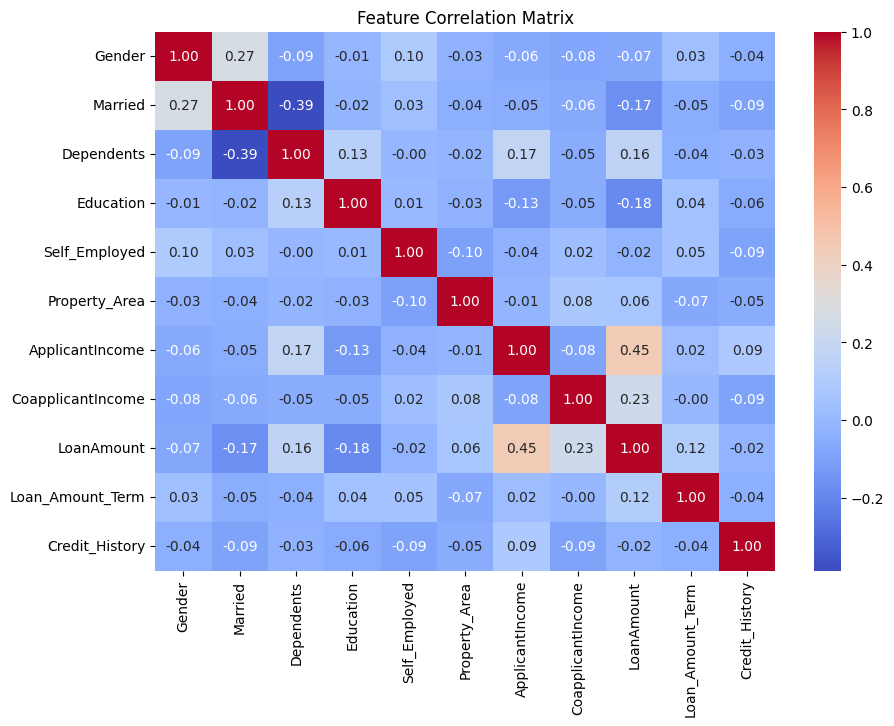

In [90]:
# PERFORMING CORRELATION ANALYSIS BETWEEN TAGET VARIABLE AND FEATURE VARIABLE
new_df_normalized["Dependents"] = new_df_normalized["Dependents"].replace("3+", 3)
# new_df_normalized
z = new_df_normalized.drop(columns="Loan_ID")
corr = z.corr()
plt.figure(figsize=(10, 7))
plt.title("Feature Correlation Matrix")
sns.heatmap(corr, annot= True, cmap= "coolwarm", fmt=".2f")

Text(0, 0.5, 'Loan Amount')

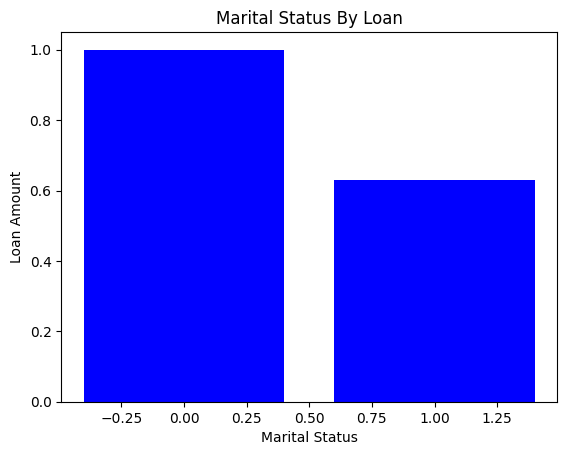

In [91]:
plt.bar(x["Married"], y, color = "blue")
plt.title("Marital Status By Loan")
plt.xlabel("Marital Status")
plt.ylabel("Loan Amount")

SPLITTING DATA INTO TRAINING AND TESTING DATA

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.05, random_state= 0)
# x_test

MODEL DEVELOPMENT AND PREDICTIONS

In [102]:


# Selecting ML Model
log_regression = LinearRegression()

# Train the DATA fitting the model with data
log_regression.fit(x_train, y_train)

# Make Prediction
y_pred = log_regression.predict(x_test)
y_pred






array([0.28367832, 0.23936792, 0.13077548, 0.24371884, 0.23627134,
       0.30911359, 0.27312999, 0.3032442 , 0.19195133, 0.13571818,
       0.25239066, 0.24428731, 0.26934557, 0.2181015 , 0.27572982])

MODEL EVALUATION USING REGRESSION EVALUATION METRICS- MEAN ABSOLUTE ERROR

In [103]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.08157602758682861
